In [3]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.callbacks import ModelCheckpoint

import os
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


In [50]:
# Getting the CSV file with all the information merged together
ml_df = pd.read_csv('Resources/all_data.csv', index_col=False)
ml_df.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,followers,songs,genre_1,genre_2,playlist_uri,track_uri,popularity,artist_name,song_name,popular
0,0,0.798,0.697,0,-7.139,1,0.0891,0.0202,0.0,0.259,...,"4,113,578",52,K-Pop,Pop,spotify:playlist:37i9dQZF1DX9tPFwDMOaN1,spotify:track:0skYUMpS0AcbpjcGsAbRGj,88,BLACKPINK,Pink Venom,1
1,1,0.798,0.697,0,-7.139,1,0.0891,0.0202,0.0,0.259,...,"295,173",70,Pop,Rock,spotify:playlist:37i9dQZF1DX6tPTxr8qwRe,spotify:track:0skYUMpS0AcbpjcGsAbRGj,87,BLACKPINK,Pink Venom,1
2,2,0.798,0.697,0,-7.139,1,0.0891,0.0202,0.0,0.259,...,"2,642,529",87,Pop,Indie,spotify:playlist:37i9dQZF1DWUa8ZRTfalHk,spotify:track:0skYUMpS0AcbpjcGsAbRGj,87,BLACKPINK,Pink Venom,1
3,3,0.798,0.697,0,-7.139,1,0.0891,0.0202,0.0,0.259,...,"762,848",50,Pop,Pop,spotify:playlist:37i9dQZF1DX0kbJZpiYdZl,spotify:track:0skYUMpS0AcbpjcGsAbRGj,87,BLACKPINK,Pink Venom,1
4,4,0.798,0.697,0,-7.139,1,0.0891,0.0202,0.0,0.259,...,"31,728,611",50,Pop,R&B,spotify:playlist:37i9dQZF1DXcBWIGoYBM5M,spotify:track:0skYUMpS0AcbpjcGsAbRGj,87,BLACKPINK,Pink Venom,1


In [18]:
#ml_df.count()
ml_df['acousticness'].value_counts()

0.06450    122
0.89100     83
0.18400     81
0.65900     69
0.05750     67
          ... 
0.00256      1
0.07510      1
0.00286      1
0.00632      1
0.00376      1
Name: acousticness, Length: 2599, dtype: int64

In [51]:
# Dropping columns which is specific for each song (like name and uri)
ml_df = ml_df.drop(columns=['Unnamed: 0', 'followers', 'songs',
                            'playlist_uri','track_uri','artist_name',
                            'song_name', 'analysis_url', 'id','uri',
                            'time_signature', 'playlist_name','track_href',
                            'type', 'mode' ])
ml_df.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genre_1,genre_2,popularity,popular
0,0.798,0.697,0,-7.139,0.0891,0.0202,0.0,0.259,0.745,90.031,186964,K-Pop,Pop,88,1
1,0.798,0.697,0,-7.139,0.0891,0.0202,0.0,0.259,0.745,90.031,186964,Pop,Rock,87,1
2,0.798,0.697,0,-7.139,0.0891,0.0202,0.0,0.259,0.745,90.031,186964,Pop,Indie,87,1
3,0.798,0.697,0,-7.139,0.0891,0.0202,0.0,0.259,0.745,90.031,186964,Pop,Pop,87,1
4,0.798,0.697,0,-7.139,0.0891,0.0202,0.0,0.259,0.745,90.031,186964,Pop,R&B,87,1


In [52]:
# Determining the number of unique values in each column.
cat_ml = ml_df.dtypes[ml_df.dtypes == 'object'].index.tolist()

ml_df[cat_ml].nunique()

genre_1    17
genre_2    20
dtype: int64

In [54]:
genre_type_count = ml_df.genre_1.value_counts()
genre_type_count

Pop                  2707
Rock                 1350
Indie                1295
Latin                1151
Electronic            847
Rap                   792
Jazz                  544
R&B                   528
Blues                 523
Instrumental          522
Country               503
Singer-Songwriter     493
Metal                 434
Christian             243
Alternative           167
K-Pop                 161
Classical             159
Name: genre_1, dtype: int64

<AxesSubplot:ylabel='Density'>

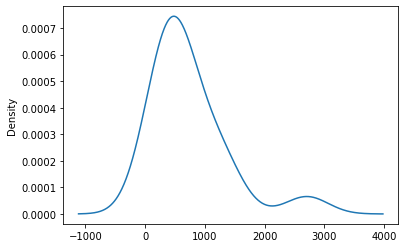

In [23]:
genre_type_count.plot.density()

In [55]:
# Selecting which values to replace
replace_genre = list(genre_type_count[genre_type_count < 550].index)

for song in replace_genre:
    ml_df.genre_1 = ml_df.genre_1.replace(song,'Other')
    
ml_df.genre_1.value_counts()

Other         4277
Pop           2707
Rock          1350
Indie         1295
Latin         1151
Electronic     847
Rap            792
Name: genre_1, dtype: int64

In [57]:
g2_type_count = ml_df.genre_2.value_counts()
g2_type_count

Pop                   3287
Indie                 1569
Rock                  1123
Alternative           1023
Workout               1020
Electronic             924
Ambient                522
Roots                  519
Rap                    409
Instrumental           339
Funk                   320
Gospel                 243
R&B                    221
Gaming                 155
Adult Contemporary     145
K-Pop                  144
Reggaeton              132
Country                120
Acoustic               103
Metal                  101
Name: genre_2, dtype: int64

<AxesSubplot:ylabel='Density'>

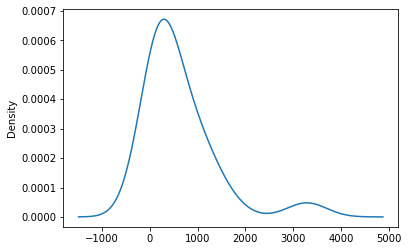

In [47]:
g2_type_count.plot.density()

In [59]:
# Selecting which values to replace
replace_genre2 = list(g2_type_count[g2_type_count < 550].index)

for song in replace_genre2:
    ml_df.genre_2 = ml_df.genre_2.replace(song,'Other')
    
ml_df.genre_2.value_counts()

Other          3473
Pop            3287
Indie          1569
Rock           1123
Alternative    1023
Workout        1020
Electronic      924
Name: genre_2, dtype: int64

In [60]:
save_ml_df = ml_df.copy()
save_ml_df.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genre_1,genre_2,popularity,popular
0,0.798,0.697,0,-7.139,0.0891,0.0202,0.0,0.259,0.745,90.031,186964,Other,Pop,88,1
1,0.798,0.697,0,-7.139,0.0891,0.0202,0.0,0.259,0.745,90.031,186964,Pop,Rock,87,1
2,0.798,0.697,0,-7.139,0.0891,0.0202,0.0,0.259,0.745,90.031,186964,Pop,Indie,87,1
3,0.798,0.697,0,-7.139,0.0891,0.0202,0.0,0.259,0.745,90.031,186964,Pop,Pop,87,1
4,0.798,0.697,0,-7.139,0.0891,0.0202,0.0,0.259,0.745,90.031,186964,Pop,Other,87,1


In [62]:
# Transposing the genre variability (trying with both genres first, than with only genre2)
# OneHoteEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce an encoded DF

encode_df = pd.DataFrame(enc.fit_transform(ml_df.genre_1.values.reshape(-1,1)))
encode_df.columns = enc.get_feature_names(['genre_1'])

encode2_df = pd.DataFrame(enc.fit_transform(ml_df.genre_2.values.reshape(-1,1)))
encode2_df.columns = enc.get_feature_names(['genre_2'])

print(encode_df.head())
print(encode2_df.head())

   genre_1_Electronic  genre_1_Indie  genre_1_Latin  genre_1_Other  \
0                 0.0            0.0            0.0            1.0   
1                 0.0            0.0            0.0            0.0   
2                 0.0            0.0            0.0            0.0   
3                 0.0            0.0            0.0            0.0   
4                 0.0            0.0            0.0            0.0   

   genre_1_Pop  genre_1_Rap  genre_1_Rock  
0          0.0          0.0           0.0  
1          1.0          0.0           0.0  
2          1.0          0.0           0.0  
3          1.0          0.0           0.0  
4          1.0          0.0           0.0  
   genre_2_Alternative  genre_2_Electronic  genre_2_Indie  genre_2_Other  \
0                  0.0                 0.0            0.0            0.0   
1                  0.0                 0.0            0.0            0.0   
2                  0.0                 0.0            1.0            0.0   
3          

/Users/bneves/opt/anaconda3/envs/mlenv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/bneves/opt/anaconda3/envs/mlenv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [70]:
genres = genre1_list

In [67]:
save_ml_df = ml_df.copy()
save_ml_df.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genre_1,genre_2,popularity,popular
0,0.798,0.697,0,-7.139,0.0891,0.0202,0.0,0.259,0.745,90.031,186964,Other,Pop,88,1
1,0.798,0.697,0,-7.139,0.0891,0.0202,0.0,0.259,0.745,90.031,186964,Pop,Rock,87,1
2,0.798,0.697,0,-7.139,0.0891,0.0202,0.0,0.259,0.745,90.031,186964,Pop,Indie,87,1
3,0.798,0.697,0,-7.139,0.0891,0.0202,0.0,0.259,0.745,90.031,186964,Pop,Pop,87,1
4,0.798,0.697,0,-7.139,0.0891,0.0202,0.0,0.259,0.745,90.031,186964,Pop,Other,87,1


In [72]:
ml_df = save_ml_df.copy()
ml_df.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genre_1,genre_2,popularity,popular
0,0.798,0.697,0,-7.139,0.0891,0.0202,0.0,0.259,0.745,90.031,186964,Other,Pop,88,1
1,0.798,0.697,0,-7.139,0.0891,0.0202,0.0,0.259,0.745,90.031,186964,Pop,Rock,87,1
2,0.798,0.697,0,-7.139,0.0891,0.0202,0.0,0.259,0.745,90.031,186964,Pop,Indie,87,1
3,0.798,0.697,0,-7.139,0.0891,0.0202,0.0,0.259,0.745,90.031,186964,Pop,Pop,87,1
4,0.798,0.697,0,-7.139,0.0891,0.0202,0.0,0.259,0.745,90.031,186964,Pop,Other,87,1


In [73]:
# MErging genre1 then genre2 and drop originals in the process

ml_df = ml_df.merge(encode_df,left_index=True, right_index=True)
#ml_df = ml_df.merge(encode2_df, left_index=True, right_index=True)

ml_df = ml_df.drop(columns=genres)

ml_df.count()

danceability          12419
energy                12419
key                   12419
loudness              12419
speechiness           12419
acousticness          12419
instrumentalness      12419
liveness              12419
valence               12419
tempo                 12419
duration_ms           12419
popularity            12419
popular               12419
genre_1_Electronic    12419
genre_1_Indie         12419
genre_1_Latin         12419
genre_1_Other         12419
genre_1_Pop           12419
genre_1_Rap           12419
genre_1_Rock          12419
dtype: int64

### Here we are splitting the strategy into two possibilities:
1 - We will use the popular column (0 or 1) as the target. Criteria for 1 is: popularity > 60

2 - Use the popularity scores as target and try to predict a reasonable score comparing to the original spotify score.

In [74]:
save2_ml_df = ml_df.copy()
save2_ml_df.tail()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,popular,genre_1_Electronic,genre_1_Indie,genre_1_Latin,genre_1_Other,genre_1_Pop,genre_1_Rap,genre_1_Rock
12414,0.582,0.730,11,-7.678,0.0402,0.26000,0.000004,0.1100,0.240,129.981,201668,57,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12415,0.582,0.730,11,-7.678,0.0402,0.26000,0.000004,0.1100,0.240,129.981,201668,57,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12416,0.481,0.917,2,-3.366,0.0385,0.00104,0.000004,0.3980,0.377,108.747,185317,44,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12417,0.628,0.787,4,-6.540,0.0328,0.00376,0.027200,0.0872,0.611,137.981,179947,44,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12418,0.384,0.623,2,-8.022,0.0282,0.10400,0.207000,0.1270,0.458,77.067,310840,55,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [75]:
# Splitting the preprocessed data into features and targets

X = ml_df.drop(columns=['popular', 'popularity'])
y = ml_df['popular'].values

# Training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y) # Test size is 25%

In [78]:
# Scaling the dataset
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [80]:
print(len(X_train_scaled))
print(len(X_test))

9314
3105


## Done prep. Now it is Play time with neural networks!

In [81]:
len(X_train_scaled[0])

18

In [82]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# Adopting 42 neurons which is something between 2 to 3 times the number of features

number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 28
hidden_nodes_layer2 = 14

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the strucutre of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 28)                532       
_________________________________________________________________
dense_1 (Dense)              (None, 14)                406       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 15        
Total params: 953
Trainable params: 953
Non-trainable params: 0
_________________________________________________________________


2022-09-07 14:46:18.198851: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-09-07 14:46:18.203000: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [83]:
# Compiling the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [85]:
# Creating a checkpoint save

os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [86]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=10)

In [87]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

2022-09-07 14:53:23.311732: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/100
292/292 [==============================] - 0s 415us/step - loss: 0.6272 - accuracy: 0.6442
Epoch 2/100
292/292 [==============================] - 0s 402us/step - loss: 0.5138 - accuracy: 0.7370
Epoch 3/100
292/292 [==============================] - 0s 403us/step - loss: 0.4999 - accuracy: 0.7567
Epoch 4/100
292/292 [==============================] - 0s 401us/step - loss: 0.4855 - accuracy: 0.7632
Epoch 5/100
292/292 [==============================] - 0s 399us/step - loss: 0.4706 - accuracy: 0.7733
Epoch 6/100
292/292 [==============================] - 0s 399us/step - loss: 0.4745 - accuracy: 0.7681
Epoch 7/100
292/292 [==============================] - 0s 402us/step - loss: 0.4722 - accuracy: 0.7730
Epoch 8/100
292/292 [==============================] - 0s 401us/step - loss: 0.4590 - accuracy: 0.7821
Epoch 9/100
292/292 [==============================] - 0s 408us/step - loss: 0.4709 - accuracy: 0.7681
Epoch 10/100
292/292 [==============================] - 0s 421us/step - l

Epoch 76/100
292/292 [==============================] - 0s 409us/step - loss: 0.3744 - accuracy: 0.8285
Epoch 77/100
292/292 [==============================] - 0s 406us/step - loss: 0.3748 - accuracy: 0.8336
Epoch 78/100
292/292 [==============================] - 0s 408us/step - loss: 0.3799 - accuracy: 0.8300
Epoch 79/100
292/292 [==============================] - 0s 413us/step - loss: 0.3790 - accuracy: 0.8326
Epoch 80/100
292/292 [==============================] - 0s 408us/step - loss: 0.3709 - accuracy: 0.8312

Epoch 00080: saving model to checkpoints/weights.80.hdf5
Epoch 81/100
292/292 [==============================] - 0s 401us/step - loss: 0.3706 - accuracy: 0.8323
Epoch 82/100
292/292 [==============================] - 0s 403us/step - loss: 0.3750 - accuracy: 0.8328
Epoch 83/100
292/292 [==============================] - 0s 399us/step - loss: 0.3907 - accuracy: 0.8199
Epoch 84/100
292/292 [==============================] - 0s 404us/step - loss: 0.3805 - accuracy: 0.8311
Epoch 

In [88]:
# Evaluating the model with our test data

model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

98/98 - 0s - loss: 0.4559 - accuracy: 0.7955
Loss: 0.4559101164340973, Accuracy: 0.7954911589622498


In [89]:
# Export our model to HDF5 file
nn.save("relu28_relu14_sigmoid_a79.h5")

#### Attempting SparseCrossEntropy
The reason been that it mathces our dataset:
 - It is usefull for multiple labels (in our case, 2)
 - Works well with OneHot (our case as well)
 
 (Update: The SparseXE got into a categorical section, which will not work in this setup)

In [123]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# Adopting 42 neurons which is something between 2 to 3 times the number of features

number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 28
hidden_nodes_layer2 = 14

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='sigmoid'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the strucutre of the model
nn.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 28)                532       
_________________________________________________________________
dense_28 (Dense)             (None, 14)                406       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 15        
Total params: 953
Trainable params: 953
Non-trainable params: 0
_________________________________________________________________


In [124]:
# Compiling the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [125]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
292/292 [==============================] - 0s 428us/step - loss: 0.6132 - accuracy: 0.6629
Epoch 2/100
292/292 [==============================] - 0s 395us/step - loss: 0.5284 - accuracy: 0.7360
Epoch 3/100
292/292 [==============================] - 0s 395us/step - loss: 0.5103 - accuracy: 0.7395
Epoch 4/100
292/292 [==============================] - 0s 412us/step - loss: 0.5036 - accuracy: 0.7485
Epoch 5/100
292/292 [==============================] - 0s 401us/step - loss: 0.4928 - accuracy: 0.7546
Epoch 6/100
292/292 [==============================] - 0s 408us/step - loss: 0.4918 - accuracy: 0.7577
Epoch 7/100
292/292 [==============================] - 0s 403us/step - loss: 0.4954 - accuracy: 0.7581
Epoch 8/100
292/292 [==============================] - 0s 394us/step - loss: 0.4923 - accuracy: 0.7584
Epoch 9/100
292/292 [==============================] - 0s 402us/step - loss: 0.4903 - accuracy: 0.7679

Epoch 00009: saving model to checkpoints/weights.09.hdf5
Epoch 10/100
29

Epoch 76/100
292/292 [==============================] - 0s 408us/step - loss: 0.4379 - accuracy: 0.7912
Epoch 77/100
292/292 [==============================] - 0s 401us/step - loss: 0.4322 - accuracy: 0.7983
Epoch 78/100
292/292 [==============================] - 0s 397us/step - loss: 0.4243 - accuracy: 0.7996
Epoch 79/100
292/292 [==============================] - 0s 399us/step - loss: 0.4205 - accuracy: 0.8023

Epoch 00079: saving model to checkpoints/weights.79.hdf5
Epoch 80/100
292/292 [==============================] - 0s 392us/step - loss: 0.4277 - accuracy: 0.8003
Epoch 81/100
292/292 [==============================] - 0s 397us/step - loss: 0.4235 - accuracy: 0.8032
Epoch 82/100
292/292 [==============================] - 0s 397us/step - loss: 0.4281 - accuracy: 0.7977
Epoch 83/100
292/292 [==============================] - 0s 395us/step - loss: 0.4242 - accuracy: 0.7969
Epoch 84/100
292/292 [==============================] - 0s 396us/step - loss: 0.4185 - accuracy: 0.8064
Epoch 

In [126]:
# Evaluating the model with our test data

model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

98/98 - 0s - loss: 0.4451 - accuracy: 0.7929
Loss: 0.445065438747406, Accuracy: 0.792914628982544


In [96]:
# Export our model to HDF5 file
nn.save("relu28_relu14_sigmoid_a80.h5")

### Just trying differente neurons and epochs

In [140]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# Adopting 42 neurons which is something between 2 to 3 times the number of features

number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 40
hidden_nodes_layer2 = 20

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the strucutre of the model
nn.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 40)                760       
_________________________________________________________________
dense_40 (Dense)             (None, 20)                820       
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 21        
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


In [141]:
# Compiling the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [142]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
292/292 [==============================] - 0s 424us/step - loss: 0.5810 - accuracy: 0.6779
Epoch 2/100
292/292 [==============================] - 0s 400us/step - loss: 0.4937 - accuracy: 0.7560
Epoch 3/100
292/292 [==============================] - 0s 402us/step - loss: 0.4721 - accuracy: 0.7728
Epoch 4/100
292/292 [==============================] - 0s 399us/step - loss: 0.4673 - accuracy: 0.7714
Epoch 5/100
292/292 [==============================] - 0s 396us/step - loss: 0.4669 - accuracy: 0.7765
Epoch 6/100
292/292 [==============================] - 0s 398us/step - loss: 0.4626 - accuracy: 0.7746
Epoch 7/100
292/292 [==============================] - 0s 398us/step - loss: 0.4524 - accuracy: 0.7808
Epoch 8/100
292/292 [==============================] - 0s 400us/step - loss: 0.4668 - accuracy: 0.7722
Epoch 9/100
292/292 [==============================] - 0s 404us/step - loss: 0.4653 - accuracy: 0.7714

Epoch 00009: saving model to checkpoints/weights.09.hdf5
Epoch 10/100
29

Epoch 76/100
292/292 [==============================] - 0s 447us/step - loss: 0.3259 - accuracy: 0.8594
Epoch 77/100
292/292 [==============================] - 0s 415us/step - loss: 0.3235 - accuracy: 0.8600
Epoch 78/100
292/292 [==============================] - 0s 398us/step - loss: 0.3265 - accuracy: 0.8626
Epoch 79/100
292/292 [==============================] - 0s 398us/step - loss: 0.3287 - accuracy: 0.8603

Epoch 00079: saving model to checkpoints/weights.79.hdf5
Epoch 80/100
292/292 [==============================] - 0s 399us/step - loss: 0.3241 - accuracy: 0.8593
Epoch 81/100
292/292 [==============================] - 0s 401us/step - loss: 0.3251 - accuracy: 0.8599
Epoch 82/100
292/292 [==============================] - 0s 411us/step - loss: 0.3336 - accuracy: 0.8568
Epoch 83/100
292/292 [==============================] - 0s 400us/step - loss: 0.3226 - accuracy: 0.8619
Epoch 84/100
292/292 [==============================] - 0s 404us/step - loss: 0.3212 - accuracy: 0.8628
Epoch 

In [143]:
# Evaluating the model with our test data

model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


98/98 - 0s - loss: 0.4441 - accuracy: 0.8187
Loss: 0.44413119554519653, Accuracy: 0.8186795711517334


## Slowly but surely

Removing more columns and analysing the impact

In [160]:
ml_df.key.value_counts()

1     1624
0     1262
7     1237
2     1180
9     1088
11    1082
5     1036
8      933
10     916
6      880
4      864
3      317
Name: key, dtype: int64

In [158]:
ml_df = save2_ml_df.copy()
ml_df.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,popular,genre_1_Electronic,genre_1_Indie,genre_1_Latin,genre_1_Other,genre_1_Pop,genre_1_Rap,genre_1_Rock
0,0.798,0.697,0,-7.139,0.0891,0.0202,0.0,0.259,0.745,90.031,186964,88,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.798,0.697,0,-7.139,0.0891,0.0202,0.0,0.259,0.745,90.031,186964,87,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.798,0.697,0,-7.139,0.0891,0.0202,0.0,0.259,0.745,90.031,186964,87,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.798,0.697,0,-7.139,0.0891,0.0202,0.0,0.259,0.745,90.031,186964,87,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.798,0.697,0,-7.139,0.0891,0.0202,0.0,0.259,0.745,90.031,186964,87,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [174]:
X.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence
0,0.798,0.697,-7.139,0.0891,0.0202,0.0,0.259,0.745
1,0.798,0.697,-7.139,0.0891,0.0202,0.0,0.259,0.745
2,0.798,0.697,-7.139,0.0891,0.0202,0.0,0.259,0.745
3,0.798,0.697,-7.139,0.0891,0.0202,0.0,0.259,0.745
4,0.798,0.697,-7.139,0.0891,0.0202,0.0,0.259,0.745


In [200]:
len(X_train_scaled[0])

8

In [173]:
# Splitting the preprocessed data into features and targets

X = ml_df.drop(columns=['popular', 'popularity','duration_ms','tempo','key',
                        'genre_1_Electronic','genre_1_Indie','genre_1_Latin','genre_1_Other','genre_1_Pop',
                        'genre_1_Rap','genre_1_Rock'])
y = ml_df['popular'].values

# Training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y) # Test size is 25%

In [195]:
# Scaling the dataset
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [207]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# Adopting 42 neurons which is something between 2 to 3 times the number of features

number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 12
hidden_nodes_layer2 = 6
# hidden_nodes_layer3 = 20

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# # Third hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the strucutre of the model
nn.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_88 (Dense)             (None, 6)                 78        
_________________________________________________________________
dense_89 (Dense)             (None, 1)                 7         
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [208]:
# Compiling the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [209]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=120,callbacks=[cp_callback])

Epoch 1/120
292/292 [==============================] - 0s 386us/step - loss: 0.7206 - accuracy: 0.5187
Epoch 2/120
292/292 [==============================] - 0s 370us/step - loss: 0.6025 - accuracy: 0.6805
Epoch 3/120
292/292 [==============================] - 0s 361us/step - loss: 0.5823 - accuracy: 0.6829
Epoch 4/120
292/292 [==============================] - 0s 360us/step - loss: 0.5700 - accuracy: 0.6952
Epoch 5/120
292/292 [==============================] - 0s 362us/step - loss: 0.5607 - accuracy: 0.7039
Epoch 6/120
292/292 [==============================] - 0s 362us/step - loss: 0.5565 - accuracy: 0.7130
Epoch 7/120
292/292 [==============================] - 0s 365us/step - loss: 0.5602 - accuracy: 0.7065
Epoch 8/120
292/292 [==============================] - 0s 377us/step - loss: 0.5587 - accuracy: 0.7081
Epoch 9/120
292/292 [==============================] - 0s 387us/step - loss: 0.5601 - accuracy: 0.7078

Epoch 00009: saving model to checkpoints/weights.09.hdf5
Epoch 10/120
29

Epoch 76/120
292/292 [==============================] - 0s 361us/step - loss: 0.5341 - accuracy: 0.7366
Epoch 77/120
292/292 [==============================] - 0s 364us/step - loss: 0.5180 - accuracy: 0.7444
Epoch 78/120
292/292 [==============================] - 0s 355us/step - loss: 0.5219 - accuracy: 0.7436
Epoch 79/120
292/292 [==============================] - 0s 371us/step - loss: 0.5223 - accuracy: 0.7482

Epoch 00079: saving model to checkpoints/weights.79.hdf5
Epoch 80/120
292/292 [==============================] - 0s 356us/step - loss: 0.5246 - accuracy: 0.7436
Epoch 81/120
292/292 [==============================] - 0s 361us/step - loss: 0.5206 - accuracy: 0.7397
Epoch 82/120
292/292 [==============================] - 0s 352us/step - loss: 0.5248 - accuracy: 0.7370
Epoch 83/120
292/292 [==============================] - 0s 354us/step - loss: 0.5168 - accuracy: 0.7483
Epoch 84/120
292/292 [==============================] - 0s 352us/step - loss: 0.5281 - accuracy: 0.7406
Epoch 

In [210]:
# Evaluating the model with our test data

model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=1)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

98/98 [==============================] - 0s 346us/step - loss: 0.5457 - accuracy: 0.7253
Loss: 0.5457160472869873, Accuracy: 0.7252817749977112


### Original attempt but with more epoch

In [234]:
# Splitting the preprocessed data into features and targets

X = ml_df.drop(columns=['popular', 'popularity'])
y = ml_df['popular'].values

# Training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y) # Test size is 25%

In [235]:
# Scaling the dataset
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [240]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# Adopting 42 neurons which is something between 2 to 3 times the number of features

number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 28
hidden_nodes_layer2 = 14

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the strucutre of the model
nn.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_102 (Dense)            (None, 28)                532       
_________________________________________________________________
dense_103 (Dense)            (None, 14)                406       
_________________________________________________________________
dense_104 (Dense)            (None, 1)                 15        
Total params: 953
Trainable params: 953
Non-trainable params: 0
_________________________________________________________________


In [241]:
# Compiling the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [242]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=500,callbacks=[cp_callback])

Epoch 1/500
292/292 [==============================] - 0s 423us/step - loss: 0.6252 - accuracy: 0.6286
Epoch 2/500
292/292 [==============================] - 0s 401us/step - loss: 0.5161 - accuracy: 0.7481
Epoch 3/500
292/292 [==============================] - 0s 403us/step - loss: 0.4873 - accuracy: 0.7547
Epoch 4/500
292/292 [==============================] - 0s 404us/step - loss: 0.4825 - accuracy: 0.7609
Epoch 5/500
292/292 [==============================] - 0s 405us/step - loss: 0.4777 - accuracy: 0.7726
Epoch 6/500
292/292 [==============================] - 0s 406us/step - loss: 0.4646 - accuracy: 0.7821
Epoch 7/500
292/292 [==============================] - 0s 406us/step - loss: 0.4628 - accuracy: 0.7806
Epoch 8/500
292/292 [==============================] - 0s 403us/step - loss: 0.4549 - accuracy: 0.7810
Epoch 9/500
292/292 [==============================] - 0s 401us/step - loss: 0.4523 - accuracy: 0.7853
Epoch 10/500
292/292 [==============================] - 0s 404us/step - l

292/292 [==============================] - 0s 405us/step - loss: 0.3415 - accuracy: 0.8484
Epoch 157/500
292/292 [==============================] - 0s 414us/step - loss: 0.3393 - accuracy: 0.8530
Epoch 158/500
292/292 [==============================] - 0s 404us/step - loss: 0.3477 - accuracy: 0.8503
Epoch 159/500
292/292 [==============================] - 0s 390us/step - loss: 0.3523 - accuracy: 0.8446
Epoch 160/500
292/292 [==============================] - 0s 395us/step - loss: 0.3411 - accuracy: 0.8440
Epoch 161/500
292/292 [==============================] - 0s 389us/step - loss: 0.3344 - accuracy: 0.8539
Epoch 162/500
292/292 [==============================] - 0s 397us/step - loss: 0.3414 - accuracy: 0.8480
Epoch 163/500
292/292 [==============================] - 0s 422us/step - loss: 0.3515 - accuracy: 0.8441
Epoch 164/500
292/292 [==============================] - 0s 381us/step - loss: 0.3550 - accuracy: 0.8496
Epoch 165/500
292/292 [==============================] - 0s 390us/ste

292/292 [==============================] - 0s 401us/step - loss: 0.3196 - accuracy: 0.8640
Epoch 312/500
292/292 [==============================] - 0s 406us/step - loss: 0.3249 - accuracy: 0.8602
Epoch 313/500
292/292 [==============================] - 0s 394us/step - loss: 0.3141 - accuracy: 0.8649
Epoch 314/500
292/292 [==============================] - 0s 393us/step - loss: 0.3174 - accuracy: 0.8614
Epoch 315/500
292/292 [==============================] - 0s 387us/step - loss: 0.3134 - accuracy: 0.8644
Epoch 316/500
292/292 [==============================] - 0s 390us/step - loss: 0.3148 - accuracy: 0.8605
Epoch 317/500
292/292 [==============================] - 0s 390us/step - loss: 0.3176 - accuracy: 0.8652
Epoch 318/500
292/292 [==============================] - 0s 392us/step - loss: 0.3179 - accuracy: 0.8631
Epoch 319/500
292/292 [==============================] - 0s 389us/step - loss: 0.3213 - accuracy: 0.8619
Epoch 320/500
292/292 [==============================] - 0s 397us/ste

292/292 [==============================] - 0s 416us/step - loss: 0.3053 - accuracy: 0.8721
Epoch 466/500
292/292 [==============================] - 0s 415us/step - loss: 0.3173 - accuracy: 0.8636
Epoch 467/500
292/292 [==============================] - 0s 399us/step - loss: 0.3075 - accuracy: 0.8700
Epoch 468/500
292/292 [==============================] - 0s 402us/step - loss: 0.3133 - accuracy: 0.8678
Epoch 469/500
292/292 [==============================] - 0s 404us/step - loss: 0.3091 - accuracy: 0.8638
Epoch 470/500
292/292 [==============================] - 0s 404us/step - loss: 0.3025 - accuracy: 0.8692
Epoch 471/500
292/292 [==============================] - 0s 396us/step - loss: 0.3235 - accuracy: 0.8619
Epoch 472/500
292/292 [==============================] - 0s 401us/step - loss: 0.3119 - accuracy: 0.8663
Epoch 473/500
292/292 [==============================] - 0s 394us/step - loss: 0.3175 - accuracy: 0.8665
Epoch 474/500
292/292 [==============================] - 0s 408us/ste

In [243]:
# Evaluating the model with our test data

model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=1)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

98/98 [==============================] - 0s 318us/step - loss: 0.4833 - accuracy: 0.8145
Loss: 0.4832592308521271, Accuracy: 0.8144927620887756


In [244]:
# Export our model to HDF5 file
nn.save("relu28_relu14_sigmoid_a81.h5")

In [224]:
# Creating a checkpoint save

os.makedirs("checkpoints2/", exist_ok=True)
checkpoint_path = "checkpoints2/weights.{epoch:02d}.hdf5"

In [225]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=100)

In [245]:
X.corr(method='pearson')

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genre_1_Electronic,genre_1_Indie,genre_1_Latin,genre_1_Other,genre_1_Pop,genre_1_Rap,genre_1_Rock
danceability,1.000000,0.176532,0.007976,0.415339,0.235930,-0.251642,-0.288158,-0.126325,0.510802,-0.127074,-0.193440,0.074486,-0.024333,0.286851,-0.325269,0.169759,0.227087,-0.210563
energy,0.176532,1.000000,0.027639,0.739625,0.082852,-0.747068,-0.310891,0.224275,0.355497,0.160893,0.024106,0.129381,-0.022046,0.082822,-0.267266,0.028810,-0.021973,0.226736
key,0.007976,0.027639,1.000000,0.023950,-0.001589,0.015128,-0.002144,-0.025700,0.031393,0.014039,0.007507,0.024396,0.002311,0.003915,-0.002136,0.002118,-0.027506,-0.003631
loudness,0.415339,0.739625,0.023950,1.000000,0.131648,-0.648365,-0.612246,0.060699,0.377848,0.173238,0.003117,0.042626,0.000524,0.168824,-0.361038,0.127179,0.055474,0.146590
speechiness,0.235930,0.082852,-0.001589,0.131648,1.000000,-0.124657,-0.162790,0.024113,0.077043,0.156775,-0.156123,-0.056367,-0.088949,0.105524,-0.136770,-0.021182,0.417082,-0.055853
acousticness,-0.251642,-0.747068,0.015128,-0.648365,-0.124657,1.000000,0.336851,-0.142544,-0.258376,-0.144581,-0.009809,-0.103890,0.028512,-0.056691,0.285380,-0.037802,-0.111507,-0.189015
instrumentalness,-0.288158,-0.310891,-0.002144,-0.612246,-0.162790,0.336851,1.000000,-0.016370,-0.227825,-0.125884,0.067407,0.214549,0.012641,-0.134329,0.252617,-0.196511,-0.115875,-0.095048
liveness,-0.126325,0.224275,-0.025700,0.060699,0.024113,-0.142544,-0.016370,1.000000,-0.013796,0.047190,-0.049888,-0.015061,-0.014613,-0.082027,-0.002297,0.009079,0.021431,0.077605
valence,0.510802,0.355497,0.031393,0.377848,0.077043,-0.258376,-0.227825,-0.013796,1.000000,0.054557,-0.149176,-0.048087,-0.012854,0.128988,-0.134380,0.109694,-0.029970,0.014566
tempo,-0.127074,0.160893,0.014039,0.173238,0.156775,-0.144581,-0.125884,0.047190,0.054557,1.000000,-0.008479,0.010417,0.015359,-0.061773,-0.120796,0.045110,0.076585,0.098480


In [250]:
XTRAIN = pd.DataFrame(X_train_scaled)

In [253]:
ml_df.corr(method='pearson')

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,popular,genre_1_Electronic,genre_1_Indie,genre_1_Latin,genre_1_Other,genre_1_Pop,genre_1_Rap,genre_1_Rock
danceability,1.000000,0.176532,0.007976,0.415339,0.235930,-0.251642,-0.288158,-0.126325,0.510802,-0.127074,-0.193440,0.304426,0.240245,0.074486,-0.024333,0.286851,-0.325269,0.169759,0.227087,-0.210563
energy,0.176532,1.000000,0.027639,0.739625,0.082852,-0.747068,-0.310891,0.224275,0.355497,0.160893,0.024106,0.108204,0.106622,0.129381,-0.022046,0.082822,-0.267266,0.028810,-0.021973,0.226736
key,0.007976,0.027639,1.000000,0.023950,-0.001589,0.015128,-0.002144,-0.025700,0.031393,0.014039,0.007507,-0.001134,-0.001273,0.024396,0.002311,0.003915,-0.002136,0.002118,-0.027506,-0.003631
loudness,0.415339,0.739625,0.023950,1.000000,0.131648,-0.648365,-0.612246,0.060699,0.377848,0.173238,0.003117,0.202291,0.172487,0.042626,0.000524,0.168824,-0.361038,0.127179,0.055474,0.146590
speechiness,0.235930,0.082852,-0.001589,0.131648,1.000000,-0.124657,-0.162790,0.024113,0.077043,0.156775,-0.156123,0.121431,0.127531,-0.056367,-0.088949,0.105524,-0.136770,-0.021182,0.417082,-0.055853
acousticness,-0.251642,-0.747068,0.015128,-0.648365,-0.124657,1.000000,0.336851,-0.142544,-0.258376,-0.144581,-0.009809,-0.101721,-0.117078,-0.103890,0.028512,-0.056691,0.285380,-0.037802,-0.111507,-0.189015
instrumentalness,-0.288158,-0.310891,-0.002144,-0.612246,-0.162790,0.336851,1.000000,-0.016370,-0.227825,-0.125884,0.067407,-0.312154,-0.299570,0.214549,0.012641,-0.134329,0.252617,-0.196511,-0.115875,-0.095048
liveness,-0.126325,0.224275,-0.025700,0.060699,0.024113,-0.142544,-0.016370,1.000000,-0.013796,0.047190,-0.049888,0.007356,0.043259,-0.015061,-0.014613,-0.082027,-0.002297,0.009079,0.021431,0.077605
valence,0.510802,0.355497,0.031393,0.377848,0.077043,-0.258376,-0.227825,-0.013796,1.000000,0.054557,-0.149176,0.161181,0.123853,-0.048087,-0.012854,0.128988,-0.134380,0.109694,-0.029970,0.014566
tempo,-0.127074,0.160893,0.014039,0.173238,0.156775,-0.144581,-0.125884,0.047190,0.054557,1.000000,-0.008479,0.064661,0.062305,0.010417,0.015359,-0.061773,-0.120796,0.045110,0.076585,0.098480
